# L’Allocation Latente de Dirichlet : un aperçu fonctionnel

## 1. Présentation du modèle LDA

<p style='text-align:justify'>
    Modèle phare du **topic modeling**, l’Allocation Latente de Dirichlet ou LDA est une technique de choix pour l’analyse de larges collections de texte. Elle répond à des questions telles que : « de quoi parle un document ? », « quels documents parlent de la même chose ? » ou encore « quels documents dois-je lire si je m’intéresse à tel sujet ? ». A la base de ce modèle se trouvent deux hypothèses fortes, selon lesquelles *1/ dans un (vaste) corpus textuel, les thématiques dont parlent les documents sont indépendantes entre elles* ; *2/ les mots constitutifs de ce document sont échangeables entre eux* ; on parle d’approche « sac de mots », ou « bag of words ». Ainsi, les phrases : « Grosminet a mangé Titi » et « Titi a mangé Grosminet » sont parfaitement équivalentes du point de vue de ce modèle. Bien que cette équivalencepuisse choquer tant la sémantique est différente pour le lecteur humain, ces hypothèses sont pourtant parmi celles à l’origine du succès et surtout des performances de la LDA.
</p>

<p style='text-align:justify'>
    Lorsque l’on parle de de texte, trois niveaux de granularité sont ici à considérer, de la plus fine à la plus grossière : *1/ le mot*, qui est l’unité de base d’un vocabulaire ; *2/ le document*, soit une séquence de mots ; *3/ le corpus*, c’est-à-dire une collection de documents.
</p>

<figure>
    <img src='img/text.svg'/>
    <figcaption style='text-align:center'>*Les trois "composantes" du texte*</figcaption>
</figure>

<p style='text-align:justify'>
    Chaque document appartient à une voire plusieurs *thématiques* (ou *topics*) connues d’avance : on considère que ce sont des **mélanges** de thématiques, dans des proportions diverses. Il s’agit d’ailleurs de l’un des principaux apports de la LDA par rapport à d’autres modèles comme l’*unigram* et ses dérivés, qui rattachent un document à une et une seule thématique. Les thématiques sont à leur tour considérées comme des mélanges de termes qui apparaissent dans les documents . Concrètement, du point de vue de l’algorithme, un corpus est un vecteur de documents et un document sera considéré comme un vecteur dont les coordonnées seront le nombre d’occurrences de chaque mot du vocabulaire.
</p>
<p style='text-align:justify'>
    Le modèle LDA a trois propriétés essentielles : *1/* c’est un modèle *probabiliste* ; *2/* c’est un modèle d’*apprentissage non supervisé* ; *3/* c’est un modèle *génératif*. C’est un modèle probabiliste et d’apprentissage non supervisé parce qu’on va chercher à trouver une correspondance entre ce que l’on observe, c’est-à-dire les mots d’un corpus textuel donné en entrée, et un espace probabilisé, où se trouvent les proportions exactes dans lesquelles les thématiques sont abordées<sup>1</sup>, sans pour autant qu’on les connaisse d’avance<sup>2</sup>. C’est un modèle génératif, car on va chercher à apprendre la distribution selon laquelle les documents ont été générés, à estimer des paramètres cachés, comme si l’on cherchait à en générer de nouveaux à partir de la nouvelle distribution<sup>3</sup>. Cette dernière propriété est essentielle, car elle va permettre *1/* de limiter le nombre de paramètres entrant en compte dans le modèle et donc de prévenir des effets de surapprentissage, notamment dans le cas où l’on chercherait à classifier post-exécution de la LDA *2/* de réduire la dimensionnalité du corpus. Il s’agit ici d’une plus-value du modèle par rapport à la *(probabilistic) Latent Semantic Indexing* par exemple, dont le nombre de paramètres à estimer augmente linéairement par rapport à la taille du corpus d’entraînement.
</p>
<p style='font-size:0.9em;text-align:justify'>
    [1] On pourrait également dire que l'on admet que les données observées sont des réalisations de variables aléatoires<br/>
    [2] Les thématiques en elles-mêmes ainsi que leur nombre sont en revanche connues.<br/>
    [3] On parle ici d’inférence *a posteriori*.<br/>
</p>

<figure>
    <img src='img/lda.svg'/>
    <figcaption style='text-align:center'>*Modèle graphique de l'Allocation Latente de Dirichlet*</figcaption>
    <figcaption style='text-align:center;font-size:0.9em'>*(en gris : les mots, seuls éléments observés)*</figcaption>
</figure>

<p style='text-align:justify'>Selon la LDA, la mécanique de génération d'un document est la suivante :</p>

* Pour un corpus C = (d<sub>1</sub>, …, d<sub>M</sub>) de M documents :
    * Pour chaque document d<sub>i</sub> = (w<sub>1</sub>, …, w<sub>Ni</sub>) de N<sub>i</sub> mots :
      * On choisit N<sub>i</sub>~Poisson(ξ)
      * On choisit θ~Dir(α)
      * Pour chacun des N<sub>i</sub> mots de w<sub>n</sub> de d<sub>i</sub> :
        * On choisit une thématique z<sub>n</sub>~Multinomiale(θ)
        * On choisit un mot w<sub>n</sub> de p(w<sub>n</sub> | z<sub>n</sub>, β)


<p style='text-align:justify'>Cinq paramètres, dont trois sont des hyperparamètres, régissent ce modèle :</p>

* ξ : cet hyperparamètre va servir à choisir le nombre de mots N<sub>i</sub> à générer pour chaque document. La variable N suit une loi de Poisson, qui est adaptée pour la modélisation d’événements rares, mais on peut lui substituer d’autres distributions en fonction des besoins étant donné que cette variable n’interagit pas avec celles que l’on veut estimer.

* β : il s’agit d’une matrice K x V<sup>1</sup>, c’est-à-dire nombre de topics x vocabulaire, associée au corpus.

* α : il s’agit du vecteur de dimension K<sup>3</sup> correspondant au paramètre de la loi de Dirichlet<sup>2</sup> à la base du modèle. Concrètement, il s’agit des proportions moyennes des thématiques que l’on peut observer sur les données d’entraînement.

* θ : il s’agit du premier paramètre latent du modèle. Il représente la proportion exacte des thématiques dans chaque document. Il suit la loi de Dirichlet de paramètre α.

* z : il s’agit du deuxième paramètre latent du modèle. Il s’agit des thématiques associées à chaque mot de chaque document.

<p style='font-size:0.9em;text-align:justify'>
    [1] V représente le vocabulaire<br/>
    [2] Rappel : K correspond au nombre de thématiques que l'on choisit de considérer.<br/>
    [3] Loi de probabilité utile pour étudier des proportions et surtout leur variation.<br/>
</p>

<figure>
    <img src='img/lda2.png'/>
    <figcaption style='text-align:center'>*Illustration de la génération d'un document*</figcaption>
</figure>

<p style='text-align:justify'>
Quelques éclairages sur cette mécanique semblent nécessaires, que nous apporterons à travers un exemple. Imaginons que nous disposions d'un corpus de documents caractérisés par trois thématiques A, B et C, chacune d'entre elles étant décrites par des mots différents. Nous voulons générer un nouveau document qui parlerait à 50% de A, 30% de B et 20% de C. On choisit un nombre de mots pour ce corpus puis une thématique et des mots qui lui sont associés en se basant sur les proportions de notre choix. D'après les proportions que nous avons choisies, pour un document de 1000 mots, il y en aurait 500 provenant du topic A, 300 relevant du topic B et 200 correspondant au topic C.
</p>
<p style='text-align:justify'>
    Toute la question est maintenant celle du processus d'apprentissage de l'algorithme. Le problème du processus génératif tel qu'il est défini est qu'il est en pratique difficile voire impossible à calculer du fait des liens entre θ et β. Il va donc falloir simplifier le modèle, c'est-à-dire redéfinir une famille de distribution sur les variables latentes pour pouvoir utliser des techniques d'approximation des paramètres, comme l'algorithme *Expectation-Maximization* (*EM*) et notamment sa variante variationnelle. En particulier, on va chercher à maximiser la log-vraisemblance suivante : <br /><br />
    <div style='text-align:center'>$\ell(\alpha,\beta)=\sum_{d=1}^{M}\log p({w_{d}}\mid \alpha,\beta)$</div><br /> <br />
Grâce à cette méthode, nous pourrons *in fine* savoir quels mots sont les plus rattachés à quel topic et surtout quels sont les plus représentatifs de ce topic.
</p>


## 2. Démonstration des packages <code>topicmodels</code> et <code>topicmodels</code>

<p style='text-align:justify'>
    Le package <code>topicmodels</code> fournit une interface avec le code C de la LDA de Blei et al. L'avantage de l'utilisation de ce package est double : *1/* nous avons accès à une implémentation fiable de la LDA, avec une méthode d'estimation connue (*méthode de Gibbs*); *2/* ce package est compatible avec le <code>tidyverse</code>, qui est un ensemble d'outils permettant de manipuler, nettoyer et traiter des données<sup>1</sup>. La partie du <code>tidyverse</code> qui nous intéresse le plus est <code>tidytext</code>. Les instructions qui suivent ont vocation à installer le package et ses dépendances ainsi qu'à en fournir une démonstration<sup>2</sup>.
</p>

<p style='font-size:0.9em;text-align:justify'>
    [1] [Plus d'informations sur le tidyverse](https://juba.github.io/tidyverse/index.html)<br/>
    [2] Source : [Text Mining with R - A tidy approach](https://www.tidytextmining.com/)<br/>
</p>

A LDA_VEM topic model with 2 topics.


topic,term,beta
1,aaron,1.686917e-12
2,aaron,3.895941e-05
1,abandon,2.654910e-05
2,abandon,3.990786e-05
1,abandoned,1.390663e-04
2,abandoned,5.876946e-05
1,abandoning,2.454843e-33
2,abandoning,2.337565e-05
1,abbott,2.130484e-06
2,abbott,2.968045e-05



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



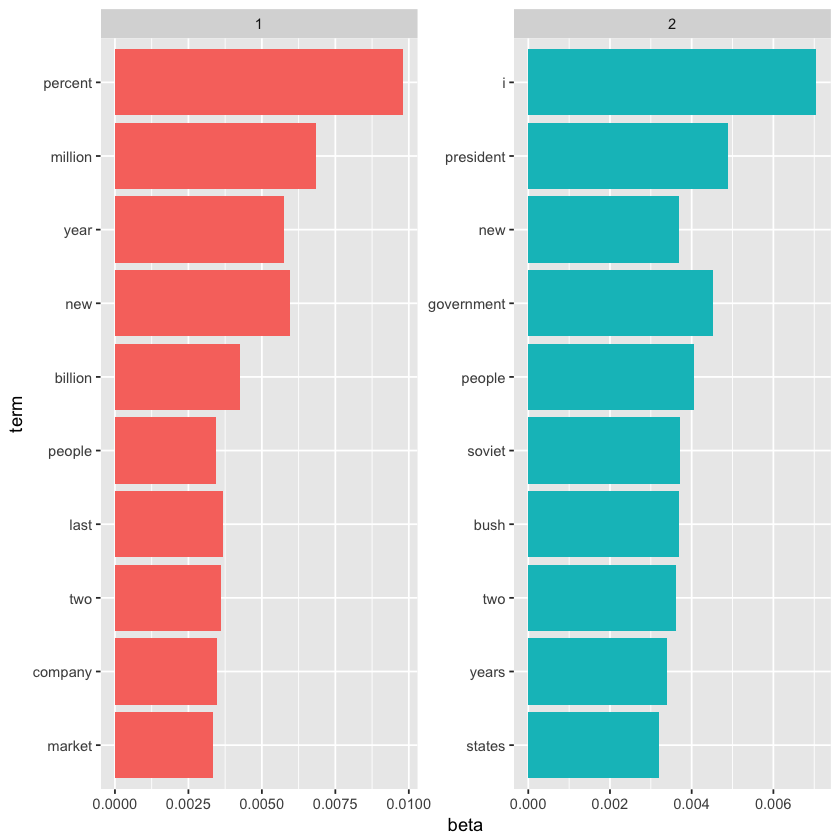

In [3]:
# install.packages("topicmodels")
library(topicmodels)
data("AssociatedPress")
ap_lda <- LDA(AssociatedPress, k=2, control=list(seed=1234))
print(ap_lda)

library(tidytext)

ap_topics <- tidy(ap_lda, matrix = "beta")
ap_topics

library(ggplot2)
library(dplyr)

ap_top_terms <- ap_topics %>%
  group_by(topic) %>%
  top_n(10, beta) %>%
  ungroup() %>%
  arrange(topic, -beta)

ap_top_terms %>%
  mutate(term = reorder(term, beta)) %>%
  ggplot(aes(term, beta, fill = factor(topic))) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~ topic, scales = "free") +
  coord_flip()